In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Filling duration through rating because value of rating and duration is swaped

In [4]:
data.loc[data["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [5]:
data["duration"] = data["duration"].fillna(data["rating"])

In [6]:
data.loc[data["rating"].str.contains("min") == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


# replacing all the rating whose rating is in "min" with "NA" (Not Rated)

In [7]:
data.loc[data["rating"].str.contains("min",na=True),"rating"] = np.nan

In [8]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added 
when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
and imputes in place of nulls the corresponding mode

In [9]:
data["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [10]:
data.loc[data["release_year"] ==2013]["date_added"].mode().values[0]

'November 1, 2018'

In [11]:
data.loc[data["release_year"] ==2013]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
76,s77,TV Show,Yowamushi Pedal,NaN,"Daiki Yamashita, Kohsuke Toriumi, Jun Fukushim...",Japan,"September 14, 2021",2013,TV-14,1 Season,"Anime Series, International TV Shows","A timid, anime-loving teen gets drawn into a s..."
124,s125,TV Show,Pororo - The Little Penguin,NaN,NaN,South Korea,"September 2, 2021",2013,TV-Y7,3 Seasons,"Kids' TV, Korean TV Shows","On a tiny island, Pororo the penguin has fun a..."
209,s210,Movie,Once Upon a Time in Mumbai Dobaara!,Milan Luthria,"Akshay Kumar, Imran Khan, Sonakshi Sinha, Sona...",India,"August 27, 2021",2013,TV-14,142 min,"Dramas, International Movies, Music & Musicals",This turbulent sequel to Once Upon a Time in M...
...,...,...,...,...,...,...,...,...,...,...,...,...
8695,s8696,Movie,War Chhod Na Yaar,Faraz Haider,"Sharman Joshi, Soha Ali Khan, Javed Jaffrey, D...",India,"March 2, 2019",2013,TV-14,109 min,"Comedies, Dramas, International Movies","Set in an India-Pakistan border post, this sat..."
8727,s8728,Movie,When Hari Got Married,"Ritu Sarin, Tenzing Sonam",NaN,"United Kingdom, India, United States","December 25, 2016",2013,NR,75 min,"Documentaries, International Movies",A small-town taxi driver is arranged to be mar...
8741,s8742,TV Show,Wild Arabia,NaN,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...
8760,s8761,Movie,Would You Rather,David Guy Levy,"Brittany Snow, Jeffrey Combs, Jonny Coyne, Law...",United States,"June 5, 2019",2013,TV-MA,93 min,"Horror Movies, Independent Movies, Thrillers","In need of cash to help her sick brother, a yo..."


In [12]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# unnesting cast column e.i. creating seperate lines in each cast members in movie 

In [13]:
constraints1 = data["cast"].apply(lambda x: str(x).split(", ")).tolist()
constraints1

[['nan'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['nan'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar'],
 ['Kate Siegel',
  'Zach Gilford',
  'Hamish Linklater',
  'Henry Thomas',
  'Kristin Lehman',
  'Samantha Sloyan',
  'Igby Rigney',
  'Rahul Kohli',
  'Annarah Cymone',
  'Annabeth Gish',
  'Alex Essoe',
  'Rahul Abburi',
  'Matt Biedel',
  'Michael Trucco',
  'Crystal Ba

In [14]:
data1 = pd.DataFrame(constraints1,index = data["title"])
data1.isna()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Blood & Water,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
Ganglands,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
Jailbirds New Orleans,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Kota Factory,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
Zombie Dumb,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Zombieland,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [15]:
data1 = data1.stack()
data1

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 64951, dtype: object

In [16]:
data1 = data1.reset_index()
data1

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64946,Zubaan,3,Manish Chaudhary
64947,Zubaan,4,Meghna Malik
64948,Zubaan,5,Malkeet Rauni
64949,Zubaan,6,Anita Shabdish


In [17]:
data1.drop("level_1", inplace=True,axis=1)
data1

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [18]:
data1 = data1.rename(columns = {0:"actor"})
data1.isna()

,title,actor
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
64946,False,False
64947,False,False
64948,False,False
64949,False,False


# unnesting director column e.i. seperating each lines for each director in movie

In [19]:
constraints2 = data["director"].apply(lambda x: str(x).split(", ")).tolist()
data2 = pd.DataFrame(constraints2, index = data["title"])
data2 = data2.stack()
data2 = data2.reset_index()
data2.drop("level_1",axis=1,inplace=True)
data2 = data2.rename(columns = {0:"director"})
data2

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [20]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# unnesting country column e.i. seperating each lines for each country in movie

In [21]:
constraints3 = data["country"].apply(lambda x: str(x).split(", ")).tolist()
data3 = pd.DataFrame(constraints3, index = data["title"])
data3 = data3.stack()
data3 = data3.reset_index()
data3.drop("level_1",axis=1,inplace=True)
data3 = data3.rename(columns = {0:"country"})
data3

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


# unnesting genre column e.i. seperating each lines for each genre in movie

In [22]:
constraints4 = data["listed_in"].apply(lambda x:str(x).split(", ")).tolist()
data4 = pd.DataFrame(constraints4,index=data["title"])
data4 = data4.stack()
data4 = data4.reset_index()
data4 = data4.drop("level_1",axis=1)
data4 = data4.rename(columns={0:"genre"})
data4

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


# merging data1, data2, data3, data4

In [23]:
merge1 = pd.merge(data1,data2 ,on="title") #by default it is inner
merge2 = pd.merge(merge1,data3 ,on="title")
merge3 = pd.merge(merge2,data4 ,on="title")
print(merge3.isna().sum())
# merge3

title       0
actor       0
director    0
country     0
genre       0
dtype: int64


In [24]:
merge3["actor"].replace(["nan"],[np.nan],inplace=True)
merge3["director"].replace(["nan"],[np.nan],inplace=True)
merge3["country"].replace(["nan"],[np.nan],inplace=True)
print(merge3.isna().sum())
merge3

title           0
actor        2146
director    50643
country     11897
genre           0
dtype: int64


,title,actor,director,country,genre
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,NaN,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,NaN,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,NaN,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,NaN,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies


# merging our unnested data with the original data

In [25]:
data_final=merge3.merge(data[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on = ['title'], how = 'left')
data_final.head()

,title,actor,director,country,genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,NaN,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,NaN,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,NaN,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,NaN,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added when release year was 2013.So below piece of code just checks the mode of date added for release year=2013 and imputes in place of nulls the corresponding mode


# filling date added using release year's date added as a mode

In [26]:
for i in data_final[data_final["date_added"].isnull()]["release_year"].unique():
    imp = data_final[data_final["release_year"]==i]["date_added"].mode().values[0]
    data_final.loc[data_final['release_year']==i,"date_added"]=data_final.loc[data_final['release_year']==i,"date_added"].fillna(imp)

In [27]:
data_final.isna().sum()

title               0
actor            2146
director        50643
country         11897
genre               0
show_id             0
type                0
date_added          0
release_year        0
rating             70
duration            0
dtype: int64

# filling country using director's country as a mode

In [28]:
for i in data_final[data_final["country"].isna()]["director"].unique():
    if i in data_final[data_final["country"].isna()== False]["director"].unique():
        imp = data_final[data_final["director"]==i]["country"].mode().values[0]
        data_final.loc[data_final['director']==i,'country']=data_final.loc[data_final['director']==i,'country'].fillna(imp)

In [29]:
data_final.isna().sum()

title               0
actor            2146
director        50643
country          9203
genre               0
show_id             0
type                0
date_added          0
release_year        0
rating             70
duration            0
dtype: int64

So we imputed the country column on the basis of directors whose other movie titles had countries given. But there might be directors who have only one occurence in our data. In that scenario, I have used Actors as a basis. i.e- for this Actor majorly acts in movies of which country? Imputation has been done on this basis. For remaining rows, country has been filled as Unknown Country

In [30]:
for i in data_final[data_final['country'].isnull()]["actor"].unique():
    if i in data_final[~data_final['country'].isnull()]['actor'].unique():
        imp=data_final[data_final['actor']==i]['country'].mode().values[0]
        data_final.loc[data_final['actor']==i,'country']=data_final.loc[data_final['actor']==i,'country'].fillna(imp)

In [31]:
#If there are still nulls, I just replace it by Unknown Country
data_final['country'].fillna('Unknown Country',inplace=True)   #3300 are unknown country    
data_final.isnull().sum()

title               0
actor            2146
director        50643
country             0
genre               0
show_id             0
type                0
date_added          0
release_year        0
rating             70
duration            0
dtype: int64

# actors and directors cannot be predicted with any such columns so all null values are replaced with unknown actors and directors

In [32]:
data_final["actor"] = data_final["actor"].fillna("Unknown_actor")
data_final["director"] = data_final["director"].fillna("Unknown_director")
data_final

,title,actor,director,country,genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown_actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [33]:
data_final.isna().sum()

title            0
actor            0
director         0
country          0
genre            0
show_id          0
type             0
date_added       0
release_year     0
rating          70
duration         0
dtype: int64

In [34]:
data_final["duration"].value_counts()

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

In [35]:
Data = data_final.copy()
Data["duration"] = Data["duration"].str.replace(" min","")
Data["duration_1"] = Data["duration"]
Data

,title,actor,director,country,genre,show_id,type,date_added,release_year,rating,duration,duration_1
0,Dick Johnson Is Dead,Unknown_actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
2,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
3,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111,111
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111,111
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111,111
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111,111


In [36]:
Data.loc[Data["duration_1"].str.contains("Season"),"duration_1"] = 0 
Data['duration_1'] =Data['duration_1'].astype('int')
Data.head()

,title,actor,director,country,genre,show_id,type,date_added,release_year,rating,duration,duration_1
0,Dick Johnson Is Dead,Unknown_actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [37]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         201991 non-null  object
 1   actor         201991 non-null  object
 2   director      201991 non-null  object
 3   country       201991 non-null  object
 4   genre         201991 non-null  object
 5   show_id       201991 non-null  object
 6   type          201991 non-null  object
 7   date_added    201991 non-null  object
 8   release_year  201991 non-null  int64 
 9   rating        201921 non-null  object
 10  duration      201991 non-null  object
 11  duration_1    201991 non-null  int32 
dtypes: int32(1), int64(1), object(10)
memory usage: 19.3+ MB


In [38]:
Data

,title,actor,director,country,genre,show_id,type,date_added,release_year,rating,duration,duration_1
0,Dick Johnson Is Dead,Unknown_actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111,111
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111,111
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111,111
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111,111


In [39]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
Data['duration_1'] = pd.cut(Data['duration_1'],bins=bins1,labels=labels1)
Data.head()

,title,actor,director,country,genre,show_id,type,date_added,release_year,rating,duration,duration_1
0,Dick Johnson Is Dead,Unknown_actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Ama Qamata,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Khosi Ngema,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


In [40]:
Data.loc[~Data["duration"].str.contains("Season"),"duration"] = Data.loc[~Data["duration"].str.contains("Season"),"duration_1"]
Data

,title,actor,director,country,genre,show_id,type,date_added,release_year,rating,duration,duration_1
0,Dick Johnson Is Dead,Unknown_actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,80-100
1,Blood & Water,Ama Qamata,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Khosi Ngema,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-120,100-120
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,100-120,100-120
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,100-120,100-120
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-120,100-120


In [41]:
Data.drop("duration_1",axis=1,inplace=True)
Data

,title,actor,director,country,genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown_actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Ama Qamata,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-120
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,100-120
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,100-120
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-120


In [42]:
Data["duration"].value_counts()

80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7700
150-200        6737
3 Seasons      5084
1-50           2530
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

In [43]:
Data.loc[Data["type"]=="TV Show"][10:40].head()

,title,actor,director,country,genre,show_id,type,date_added,release_year,rating,duration
11,Blood & Water,Thabang Molaba,Unknown_director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
12,Blood & Water,Thabang Molaba,Unknown_director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
13,Blood & Water,Dillon Windvogel,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
14,Blood & Water,Dillon Windvogel,Unknown_director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
15,Blood & Water,Dillon Windvogel,Unknown_director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


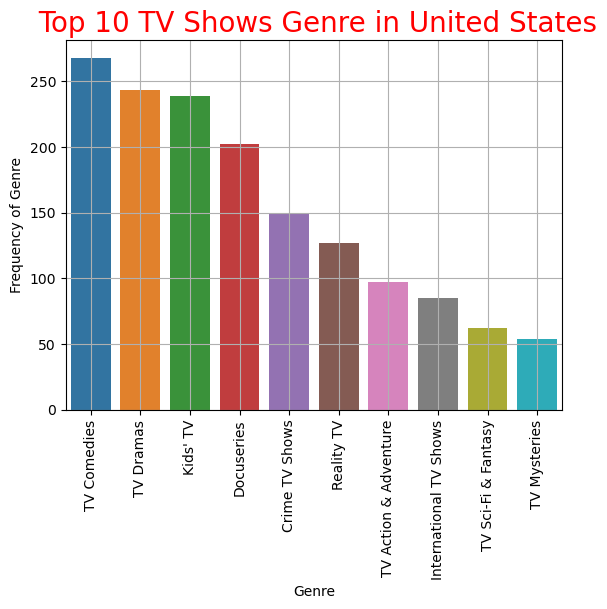

In [44]:
gen_us_tv = Data[ (Data["country"]=="United States") & (Data["type"]=="TV Show")]
gen_us_tv = gen_us_tv.groupby(["genre"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)[:10]
gen_us_tv.rename(columns={"genre":"Genre" , "title":"Frequency of Genre"} , inplace = True)
sns.barplot(data = gen_us_tv, x="Genre", y ="Frequency of Genre" ) # Boxplot
plt.xticks(rotation = 90)
plt.grid()
plt.title(" Top 10 TV Shows Genre in United States" , fontsize = 20 , color = "red" )
plt.show()

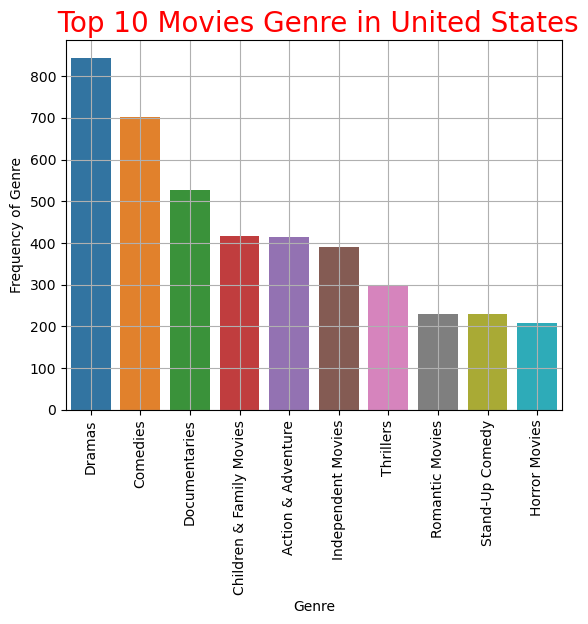

In [45]:
gen_us_mov = Data[ (Data["country"]=="United States") & (Data["type"]=="Movie")]
gen_us_mov = gen_us_mov.groupby(["genre"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)[:10]
gen_us_mov.rename(columns={"genre":"Genre" , "title":"Frequency of Genre"} , inplace = True)
sns.barplot(data = gen_us_mov, x="Genre", y ="Frequency of Genre" ) # Boxplot
plt.xticks(rotation = 90)
plt.grid()
plt.title(" Top 10 Movies Genre in United States" , fontsize = 20 , color = "red" )
plt.show()

In [46]:
Data.groupby(["genre"]).agg({"title":"nunique"}).reset_index()

,genre,title
0,Action & Adventure,859
1,Anime Features,71
2,Anime Series,176
3,British TV Shows,253
4,Children & Family Movies,641
5,Classic & Cult TV,28
6,Classic Movies,116
7,Comedies,1674
8,Crime TV Shows,470
9,Cult Movies,71


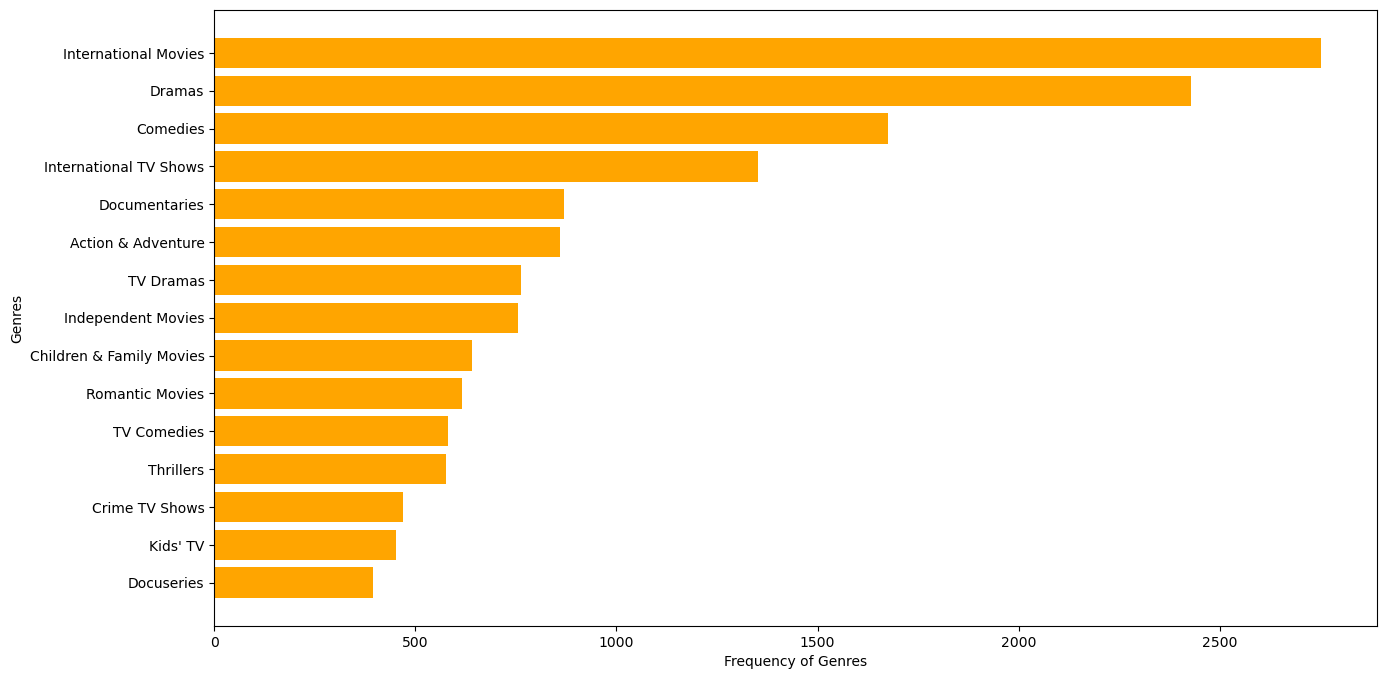

In [47]:
df_genre=Data.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

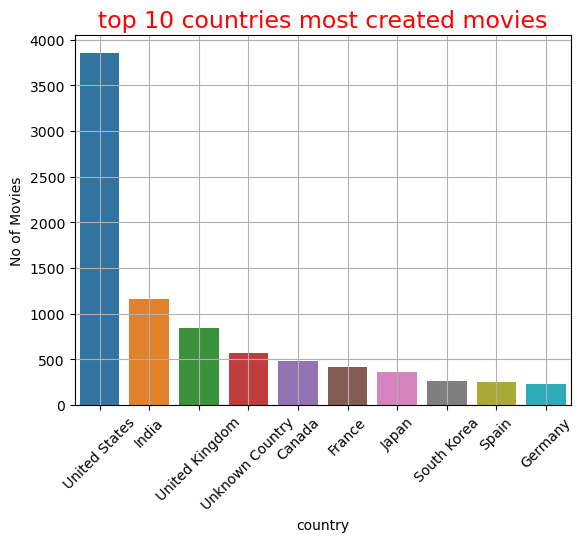

In [48]:
ind =Data.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
ind.rename(columns={"title":"No of Movies"},inplace=True)

plt.xticks(rotation=45)
plt.title("top 10 countries most created movies",color = "red",fontsize=17)
sns.barplot(data = ind, x = "country",y = "No of Movies")
plt.grid()

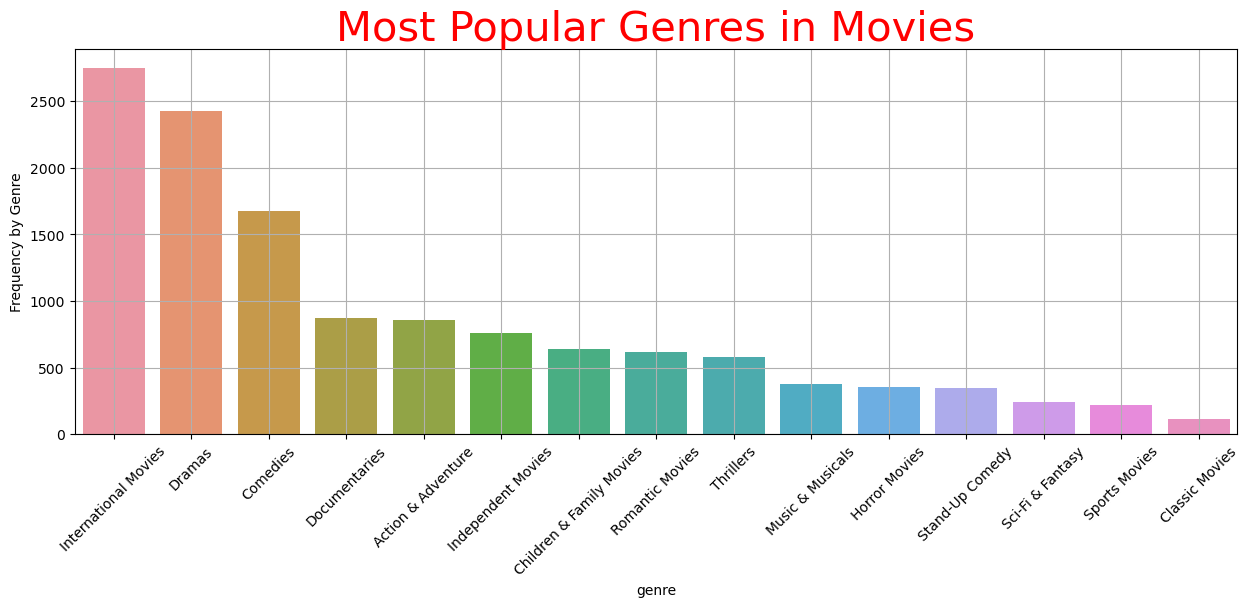

In [49]:
mov = Data[(Data["type"]=="Movie")]
mov = mov.groupby(["genre"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)[:15]
mov.rename(columns={"title":"Frequency by Genre"},inplace=True)

plt.figure(figsize=(15,5))
plt.title("Most Popular Genres in Movies", fontsize=30,color="red")
plt.xticks(rotation=45,fontsize=10)
sns.barplot(data = mov, x = "genre",y = "Frequency by Genre")
plt.grid()

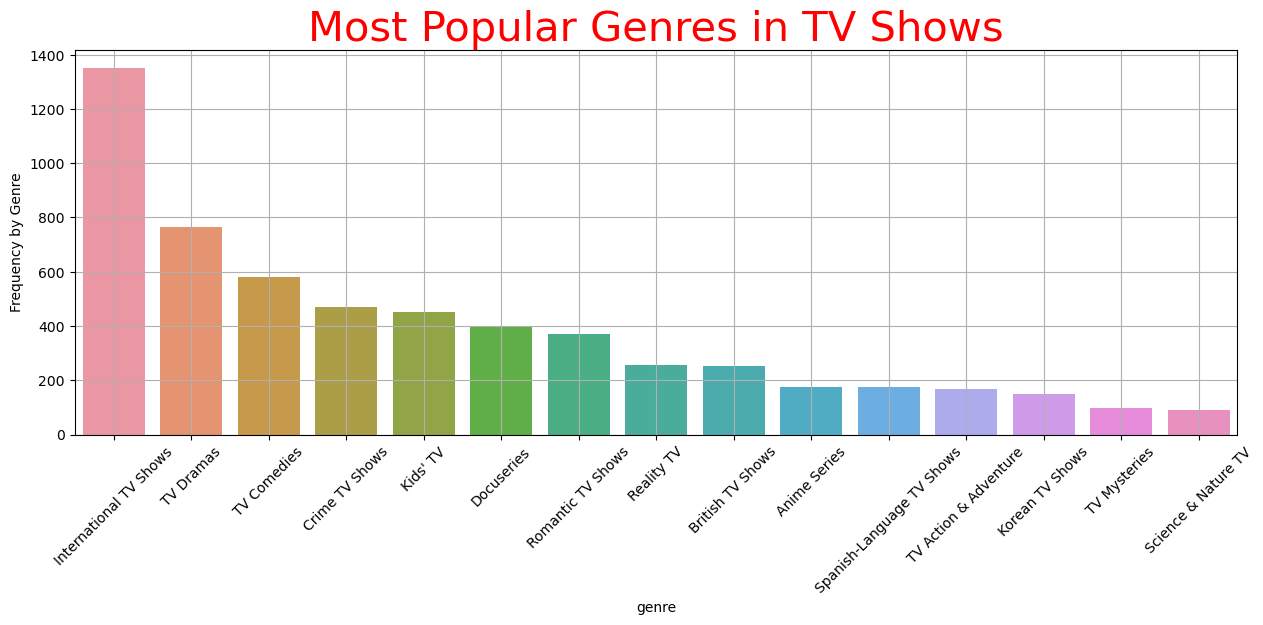

In [50]:
tv = Data[(Data["type"]=="TV Show")]
tv = tv.groupby(["genre"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)[:15]
tv.rename(columns={"title":"Frequency by Genre"},inplace=True)

plt.figure(figsize=(15,5))
plt.title("Most Popular Genres in TV Shows", fontsize=30,color="red")
plt.xticks(rotation=45,fontsize=10)
sns.barplot(data = tv, x = "genre",y = "Frequency by Genre")
plt.grid()

Text(0.5, 1.0, 'release year of movies and tv shows')

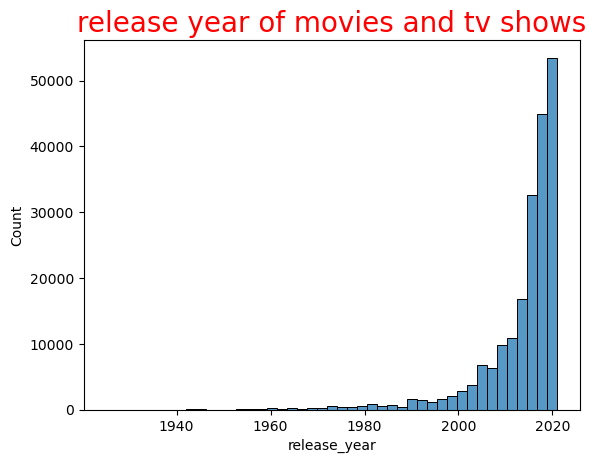

In [51]:
sns.histplot(data= Data,x ="release_year",bins=45)
plt.title("release year of movies and tv shows", fontsize=20,color="red")

Text(0.5, 1.0, 'No of Movies and Tv Shows released last 10 years')

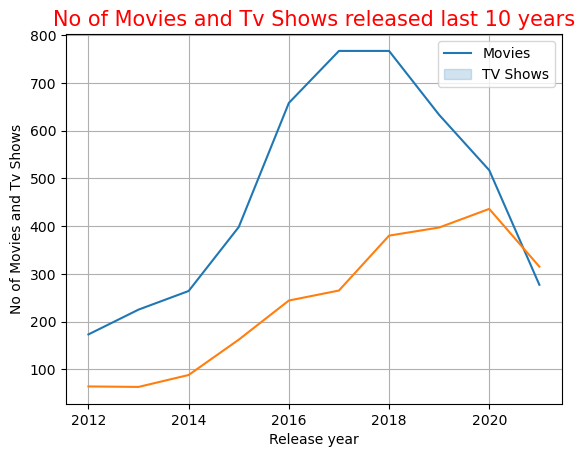

In [52]:
a = data.loc[data["type"]=="Movie"]
b = data.loc[data["type"]=="TV Show"]
a1 = a["release_year"].value_counts().head(10)
a1 = a1.reset_index()
b1 = b["release_year"].value_counts().head(10)
b1 = b1.reset_index()
a1 = a1.rename(columns={"index":"Release year","release_year":"No of Movies and Tv Shows"})
b1 = b1.rename(columns={"index":"Release year","release_year":"No of Movies and Tv Shows"})

sns.lineplot(data=a1, x="Release year",y ="No of Movies and Tv Shows")
sns.lineplot(data=b1, x="Release year",y ="No of Movies and Tv Shows")
plt.grid()
plt.legend(["Movies","TV Shows"])
plt.title("No of Movies and Tv Shows released last 10 years",color="red",fontsize=15)

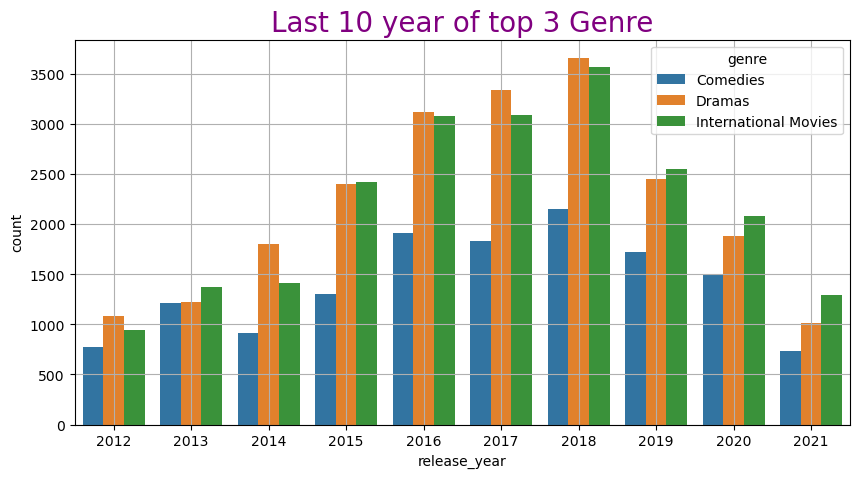

In [53]:
last10_year = Data["release_year"].value_counts().index[:10]
top3_gen = Data["genre"].value_counts().index[:3]
d1 = Data.loc[Data["release_year"].isin(last10_year) & Data["genre"].isin(top3_gen)]

plt.figure(figsize=(10,5))
sns.countplot(data=d1,x="release_year",hue="genre")
plt.title("Last 10 year of top 3 Genre",fontsize=20,color="purple")
plt.grid()

In [54]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in Data['date_added'].values:
  dt1=parse(i)
  arr.append(dt1.strftime('%Y-%m-%d'))
Data['Modified_Added_date'] =arr
Data['Modified_Added_date']=pd.to_datetime(Data['Modified_Added_date'])
Data['month_added']=Data['Modified_Added_date'].dt.month
Data['week_Added']=Data['Modified_Added_date'].dt.week
Data['year']=Data['Modified_Added_date'].dt.year
Data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12964\2491788966.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Data['week_Added']=Data['Modified_Added_date'].dt.week


,title,actor,director,country,genre,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown_actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


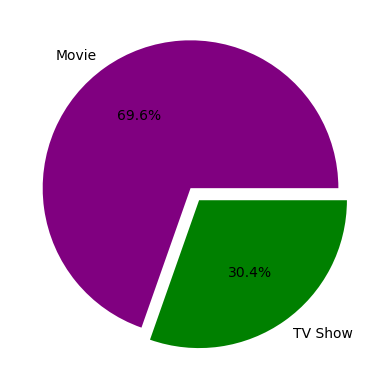

In [55]:
df_type=Data.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['purple','green'],autopct='%.1f%%')
plt.show()

In [56]:
Data.groupby(["duration"]).agg({"title":"nunique"}).sort_values(by=["title"],ascending=False)

,title
duration,
80-100,2222
1 Season,1793
100-120,1672
120-150,897
50-80,808
2 Seasons,425
1-50,287
150-200,226
3 Seasons,199


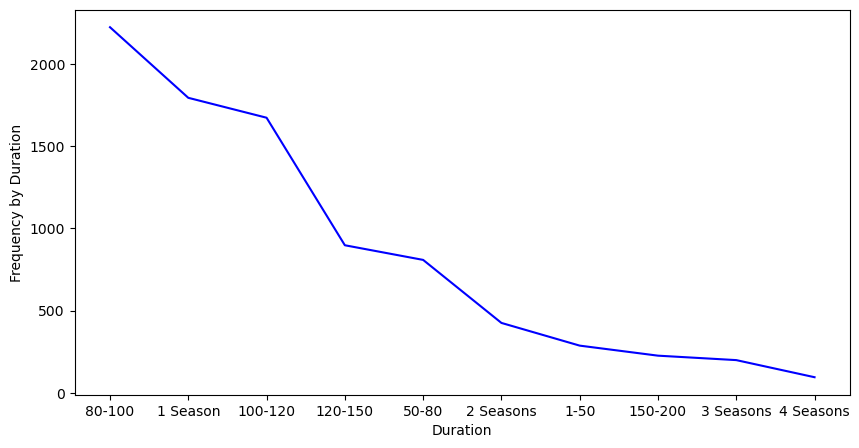

In [57]:
# t = Data.groupby("duration")
# t.first()
df_duration=Data.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.lineplot(data = df_duration,x ="duration",y="title",color='blue')
plt.ylabel('Frequency by Duration')
plt.xlabel('Duration')
plt.show()

The duration of Most Watched content in our whole data is 80-100 mins.These must be movies and Shows having only 1 Season.

# How has the number of movies released per year changed over the last 20-30 years?

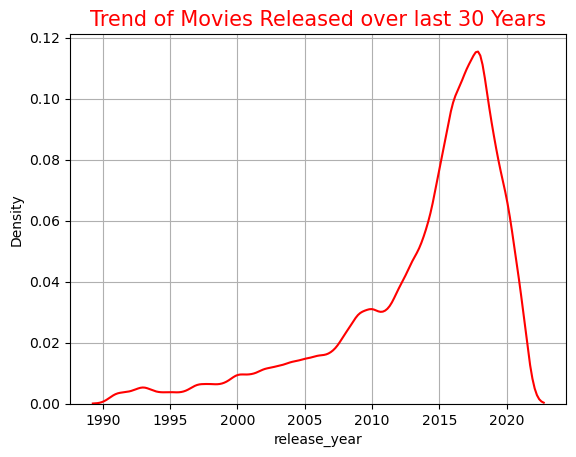

In [58]:
yyy = Data[ (Data['release_year'] > 1990) & (Data['type'] == "Movie") ]
yyy
sns.kdeplot(data=yyy, x="release_year" , color = "red") # Kernel Density Estimation(KDE)
plt.grid()
plt.title('Trend of Movies Released over last 30 Years' ,color = "red" ,fontsize = 15)
plt.show()

# What type of content is available in different countries 

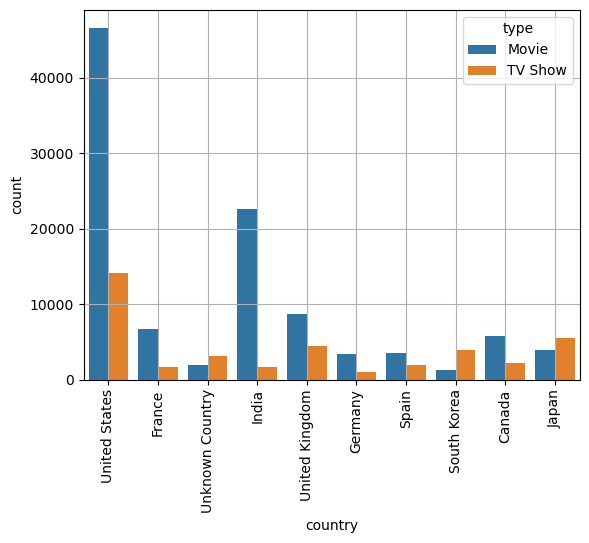

In [59]:
con = Data['country'].value_counts().head(10)
con = con.reset_index()
c = Data[Data['country'].isin(con['index'])]
sns.countplot(data = c, x="country", hue="type") # Dodget Bar Chart
plt.xticks(rotation = 90)
plt.grid()
plt.show()

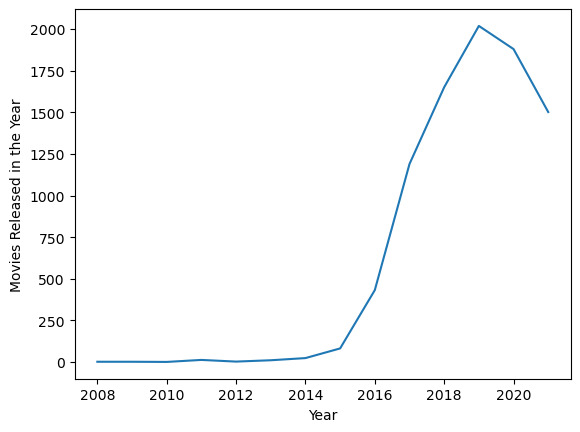

In [60]:
df_year=Data.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

The Amount of Content across Netflix has increased from 2008 continuously till 2019. Then started decreasing from here(probably due to Covid)

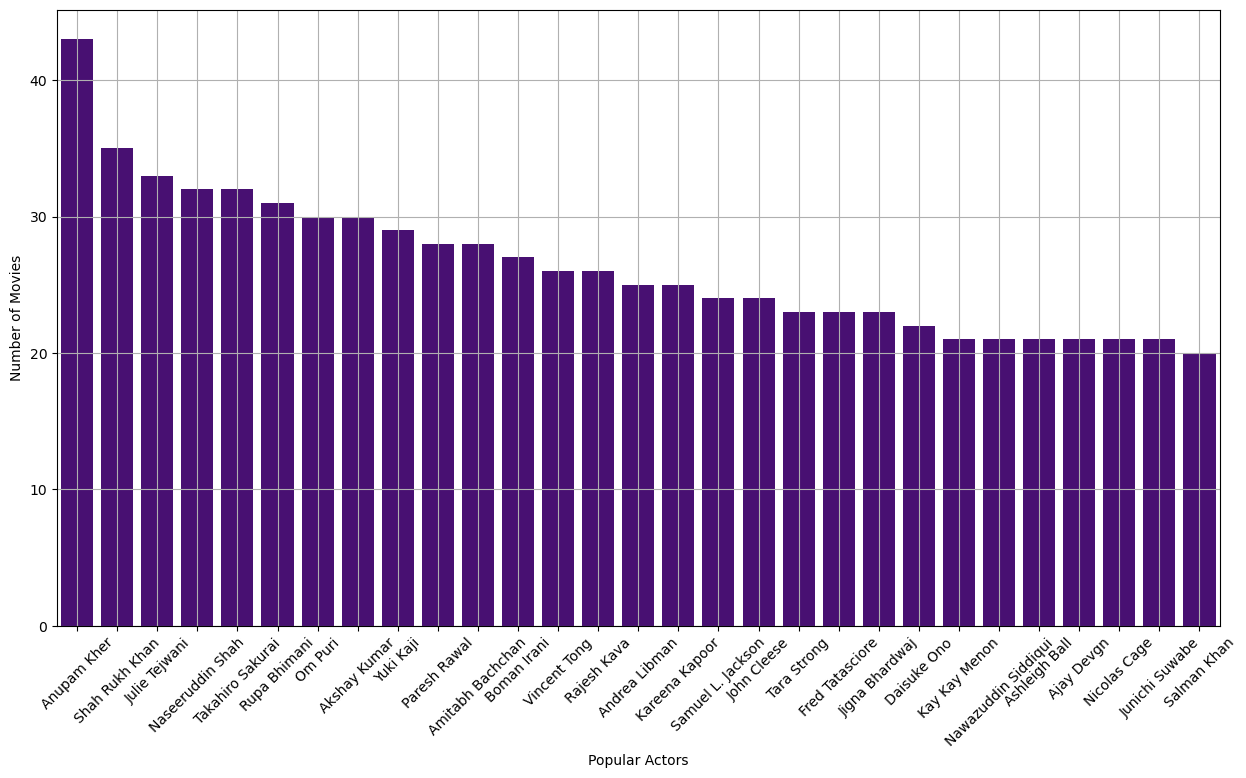

In [61]:
df_actors=Data.groupby(['actor']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:30]
df_actors=df_actors[df_actors['actor']!='Unknown_actor']
df_actors.rename(columns={"title":"No of titles"},inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(data=df_actors, x = "actor",y="No of titles",color='indigo')
plt.ylabel('Number of Movies')
plt.xlabel('Popular Actors')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai occupy the top stop in Most Watched content.

Text(0, 0.5, 'No fo Shows')

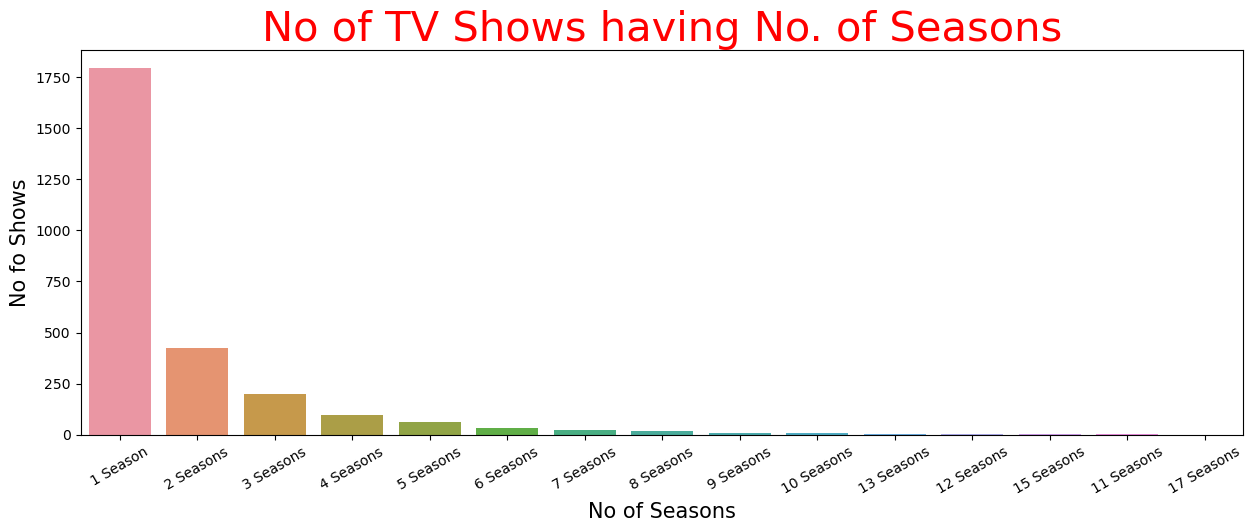

In [62]:
dur = Data.groupby(["duration"]).agg({"title":"nunique"}).reset_index().sort_values(by="title",ascending=False)
dur = dur.loc[dur["duration"].str.contains("Season")]

plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
sns.barplot(data = dur,x="duration",y="title")
plt.title("No of TV Shows having No. of Seasons",fontsize=30,color="red")
plt.xlabel("No of Seasons",fontsize=15)
plt.ylabel("No fo Shows",fontsize=15)

Across TV Shows, shows having only 1 Season are common as soon as the season length increases, the number of shows decrease and this definitely sounds as expected

In [63]:
def xyz(x):
    if "Season" not in x:
        t = " min"
        a= x + t
        return a
    return x
Data["duration"] = Data["duration"].apply(lambda x: xyz(x))
Data

,title,actor,director,country,genre,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown_actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100 min,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown_director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown_director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-120 min,2019-03-02,3,9,2019
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,100-120 min,2019-03-02,3,9,2019
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,100-120 min,2019-03-02,3,9,2019
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-120 min,2019-03-02,3,9,2019


Text(0, 0.5, 'No of Movies')

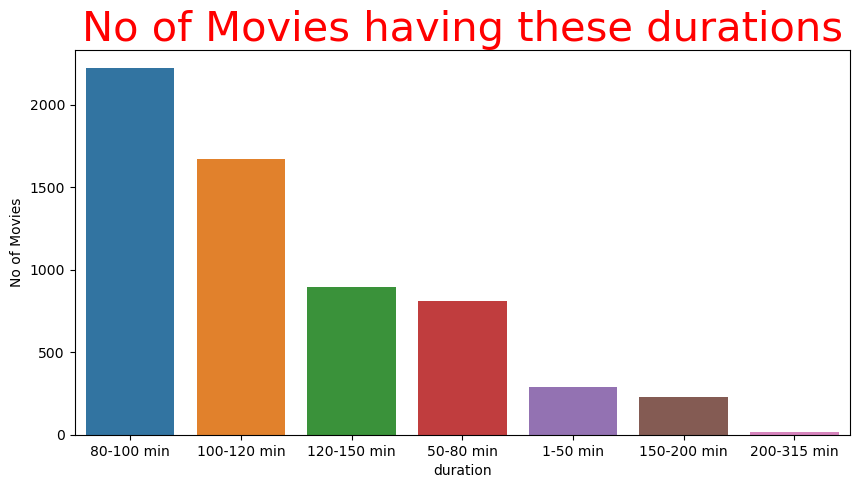

In [64]:
movdur = Data.groupby(["duration"]).agg({"title":"nunique"}).reset_index().sort_values(by="title",ascending=False)
movdur = movdur.loc[~movdur["duration"].str.contains("Season")]

plt.figure(figsize=(10,5))
plt.title("No of Movies having these durations",fontsize=30,color="red")

sns.barplot(data= movdur,x="duration",y="title")
plt.ylabel("No of Movies")

Across movies 80-100,100-120 and 120-150 is the ranges of minutes for which most movies lie. So quite possibly 80-150 mins is the sweet spot we would be wanting for movies.

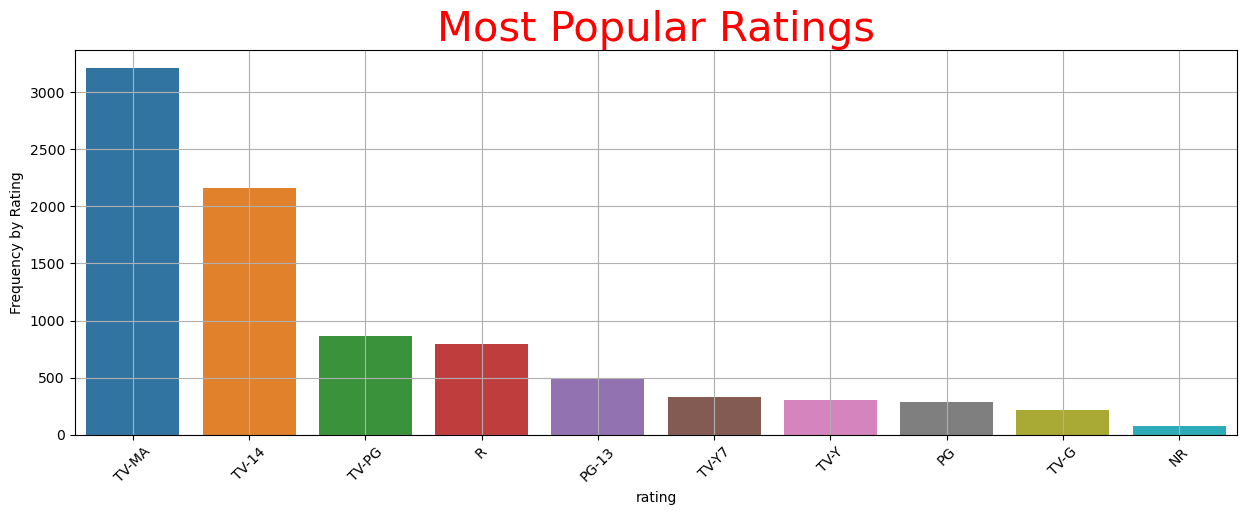

In [65]:
rat=Data.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
rat.rename(columns={"title":"Frequency by Rating"},inplace=True)

plt.figure(figsize=(15,5))
plt.title("Most Popular Ratings", fontsize=30,color="red")
plt.xticks(rotation=45,fontsize=10)
sns.barplot(data = rat, x = "rating",y = "Frequency by Rating")
plt.grid()


So it seems that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages.
Moreover there are no TV Shows having a rating of R

In [66]:
Data.groupby(['week_Added']).agg({"title":"nunique"})

,title
week_Added,
1,372
2,108
3,113
4,88
5,208
6,97
7,147
8,110
9,254


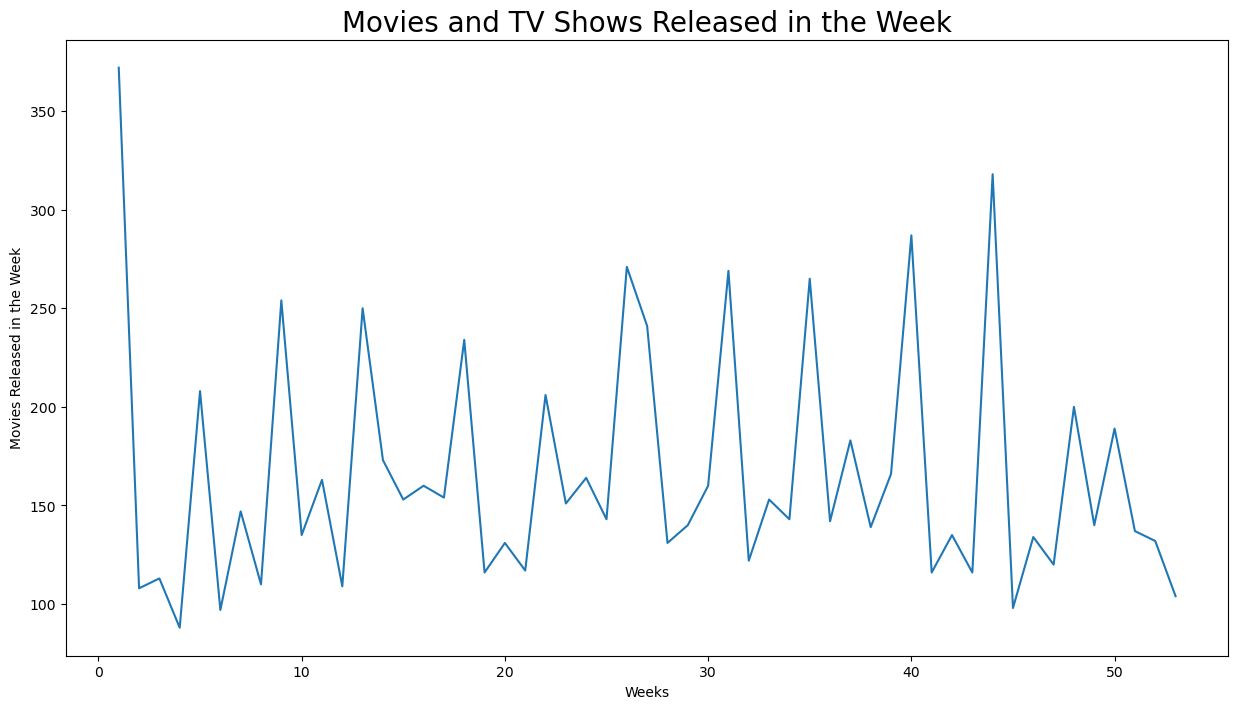

In [67]:
df_week=Data.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.title("Movies and TV Shows Released in the Week",fontsize=20)
plt.xlabel("Weeks")
plt.ylabel("Movies Released in the Week")
plt.show()

In [68]:
Data.groupby(['month_added']).agg({"title":"nunique"})

,title
month_added,
1,738
2,563
3,742
4,765
5,632
6,728
7,832
8,756
9,772


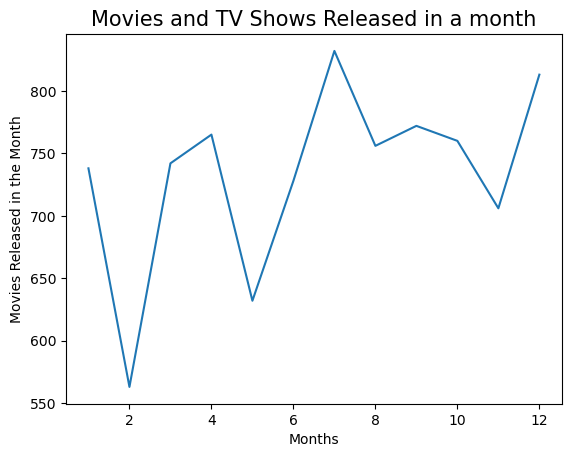

In [69]:
df_month=Data.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.title("Movies and TV Shows Released in a month",fontsize=15)
plt.ylabel("Movies Released in the Month")
plt.xlabel("Months")
plt.show()

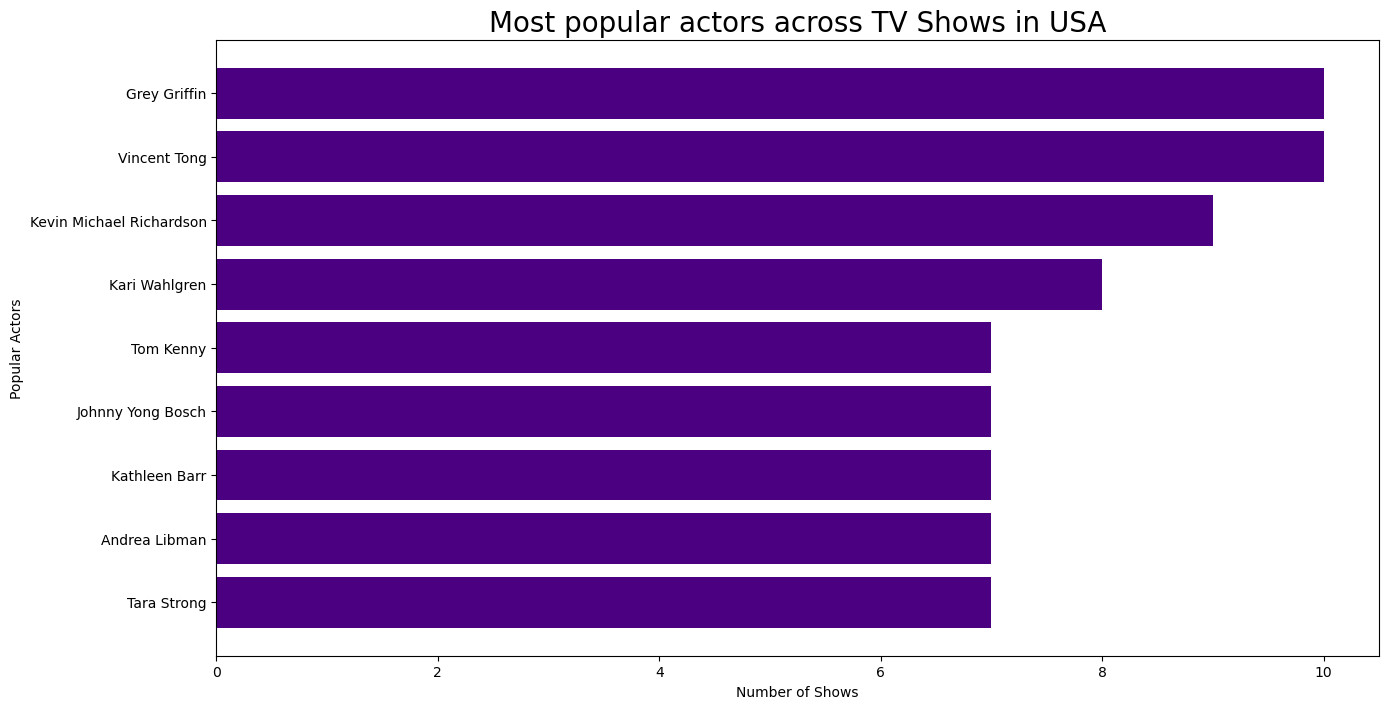

In [70]:
tv_show = Data.loc[(Data["type"]=="TV Show") & (Data["country"]=="United States")]
df_actors=tv_show.groupby(['actor']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['actor']!='Unknown_actor']
plt.figure(figsize=(15,8))
plt.title("Most popular actors across TV Shows in USA",fontsize=20)
plt.barh(df_actors[::-1]['actor'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

Grey Griffin and Vincent Tong are the most popular actors across TV Shows in USA

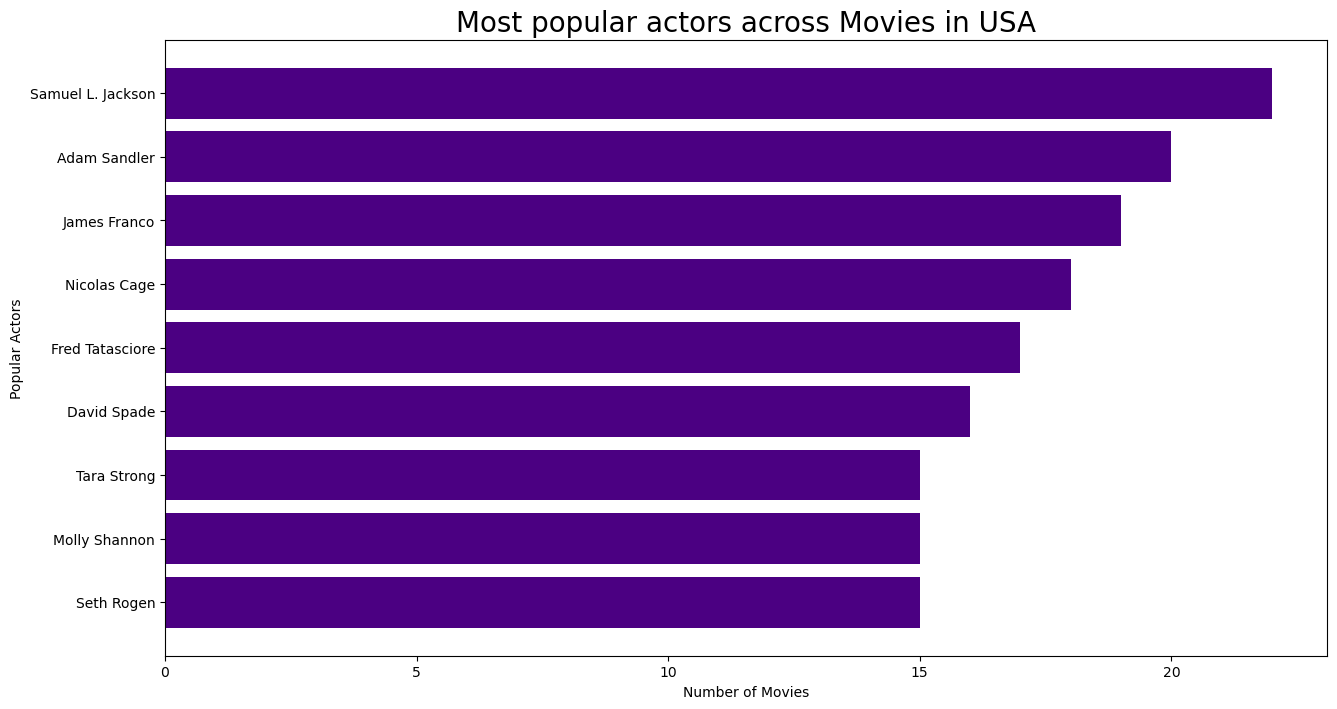

In [71]:
movies = Data.loc[(Data["type"]=="Movie") & (Data["country"]=="United States")]
df_actors=movies.groupby(['actor']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['actor']!='Unknown_actor']
plt.figure(figsize=(15,8))
plt.title("Most popular actors across Movies in USA",fontsize=20)
plt.barh(df_actors[::-1]['actor'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Samuel Jackson,Adam Sandler,James Franco and Nicolas Cage are very much popular across movies on Netflix in USA

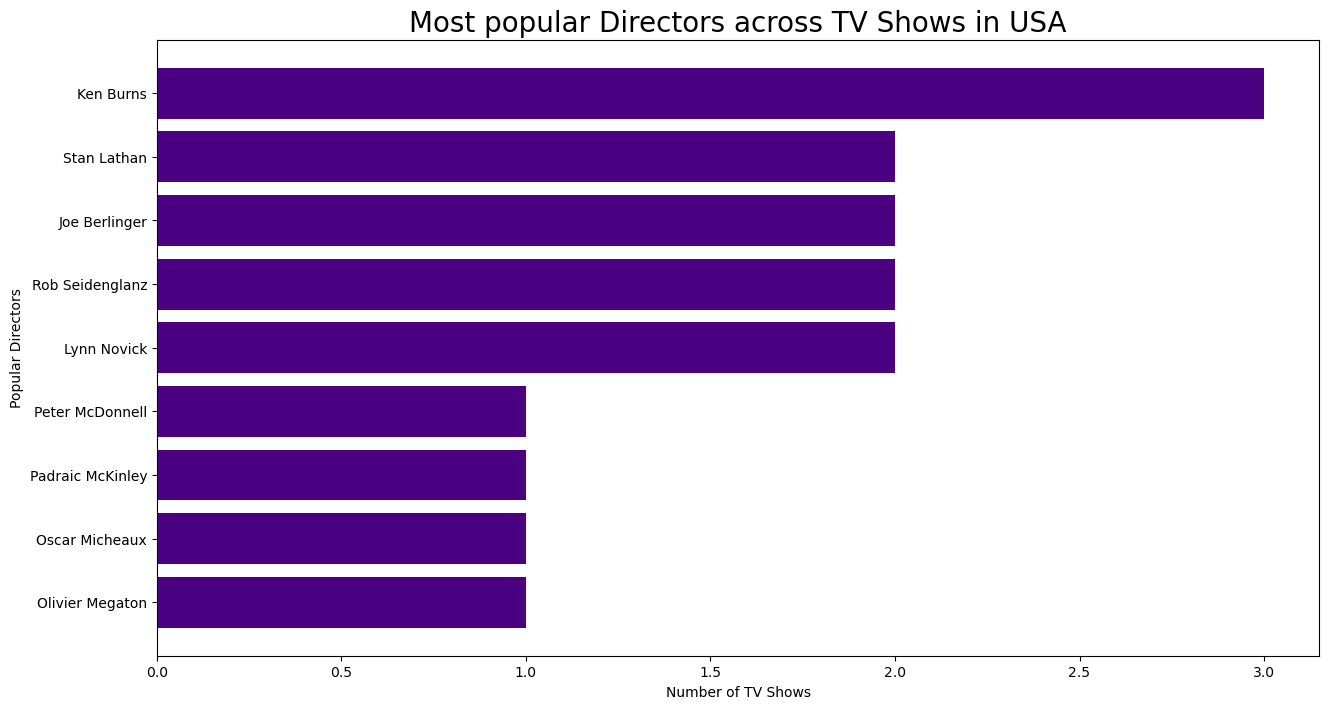

In [72]:
df_directors=tv_show.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown_director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of TV Shows')
plt.title("Most popular Directors across TV Shows in USA",fontsize=20)
plt.ylabel('Popular Directors')
plt.show()

Ken Burns,Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix in USA

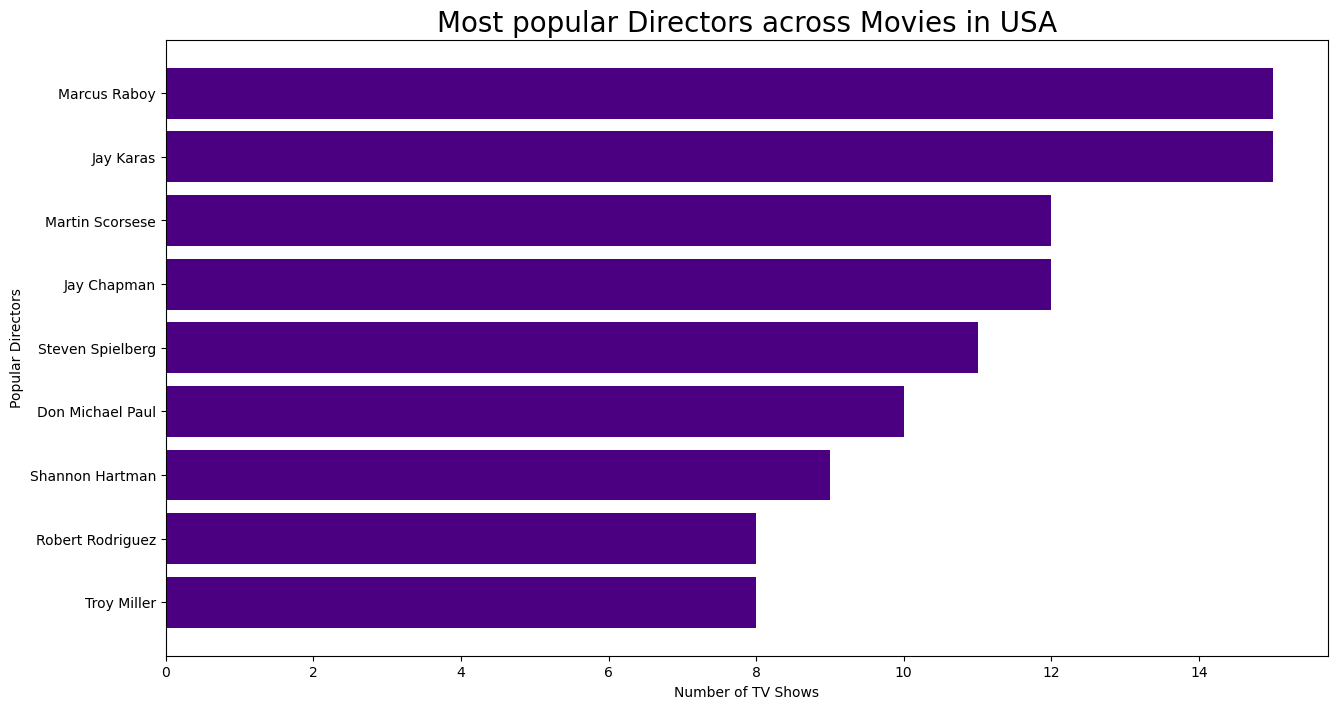

In [73]:
df_directors=movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown_director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of TV Shows')
plt.title("Most popular Directors across Movies in USA",fontsize=20)
plt.ylabel('Popular Directors')
plt.show()

Jay Karas,Marcus Raboy,Martin Scorcese and Jay Chapman are popular directors across movies in USA

array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'Modified_Added_date'}>],
       [<Axes: title={'center': 'month_added'}>,
        <Axes: title={'center': 'week_Added'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

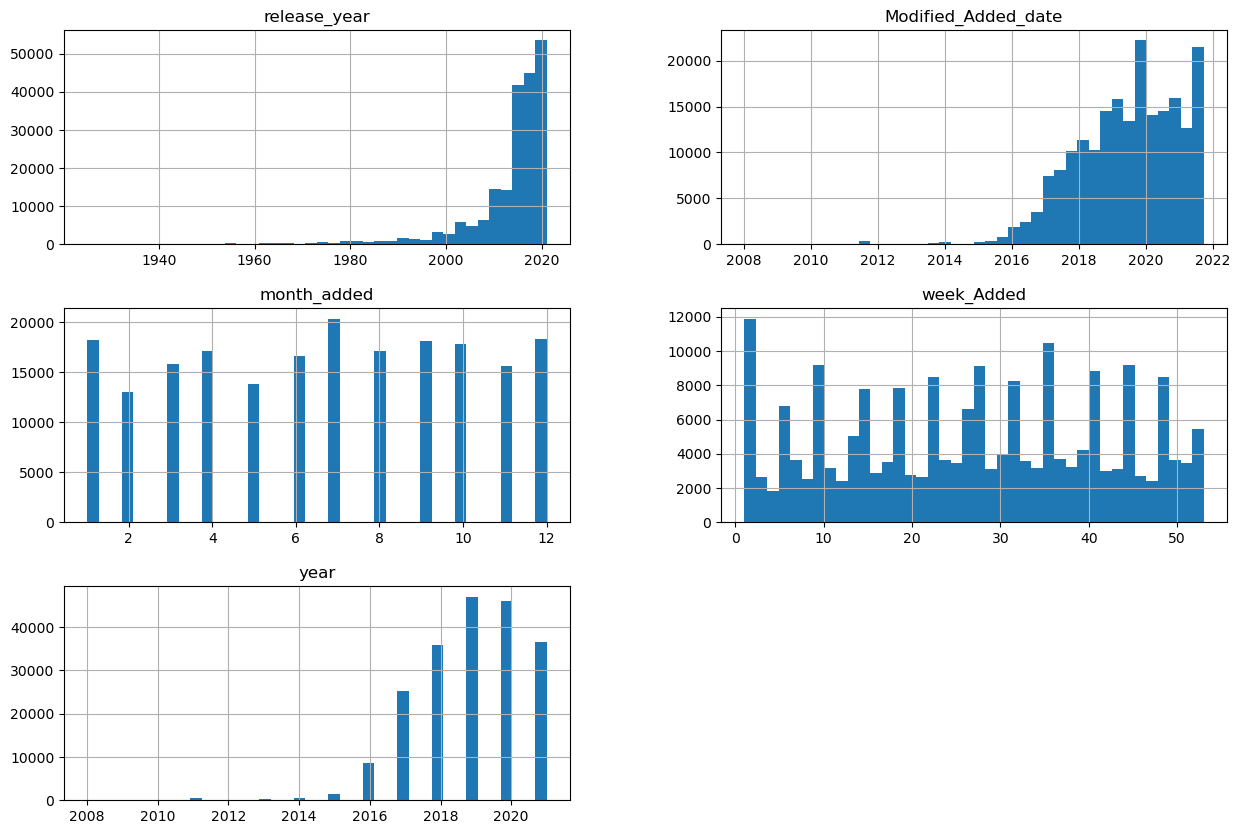

In [80]:
Data.hist(bins=40,figsize=(15,10))

In [76]:
print("Done")

Done
